# Research Progress Meeting 2020-02-28

## Where do I come from, where do I go?

* Research series presentation went well

* But I lost track of what was said and what I was going to do

* And I want to get stuff done

## Setup

In [1]:
library(tidyverse)
library(oildata)
library(DataAnalysisTools)
options(repr.plot.width=7, repr.plot.height=4)

── Attaching packages ─────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
head(pipelines)

year,commodity,ID,name,hca_total,hca_offshore,hca_onshore,total_miles,total_onshore,total_offshore,incidents,significant_incidents,serious_incidents,incidents_volume,significant_incidents_volume,incidents_cost,significant_incidents_cost
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2008,crude,11733,Loop,38.25,3,35.25,112.50,89.90,22.6,0,0,0,0.00000,0.0000,0,0
2008,hvl,3156,Davis Gas Processing,1.00,0,1.00,30.00,30.00,0.0,0,0,0,0.00000,0.0000,0,0
2008,non_hvl,31721,Pipeline Technology,21.93,0,21.93,21.93,21.93,0.0,0,0,0,0.00000,0.0000,0,0
2008,non_hvl,32135,Conocophillips - Los Angeles Refinery,13.00,0,13.00,13.00,13.00,0.0,0,0,0,0.00000,0.0000,0,0
2008,non_hvl,4805,Explorer Pipeline,1204.11,0,1204.11,1882.10,1882.10,0.0,11,3,0,61.93651,39.8254,2983896,2806189
2008,hvl,Amoco (Group),Dome Petroleum,140.12,0,140.12,140.68,140.68,0.0,0,0,0,0.00000,0.0000,0,0


## Throwback: Learning insight from PhD Research Series

In [3]:
learning_data <- pipelines %>%
    filter(commodity %in% c("crude", "hvl", "non_hvl")) %>%
    group_by(year) %>%
    summarize(miles = sum(total_miles, na.rm = T), 
              incidents = sum(significant_incidents, na.rm = T), 
              incident_rate = incidents/miles)

head(learning_data) %>%
    jupyter_styling(font_size = 14)

year,miles,incidents,incident_rate
2004,151740.8,121,0.0007974
2005,159142.8,124,0.0007792
2006,159488.4,100,0.0006270
2007,162668.2,103,0.0006332
2008,164592.0,123,0.0007473
2009,170883.7,105,0.0006145


### Incident counts

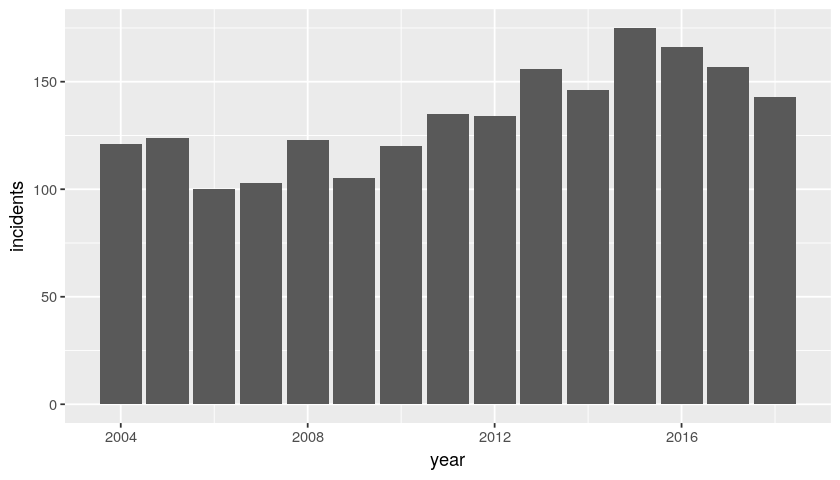

In [4]:
ggplot(learning_data, aes(x = year, y = incidents)) +
    geom_col()

### Pipeline network expansion

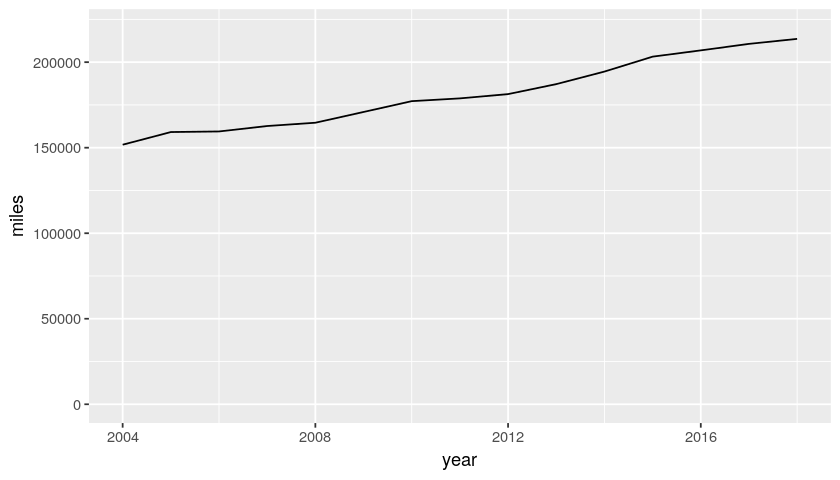

In [5]:
ggplot(learning_data, aes(x = year, y = miles)) +
    geom_line() + 
    scale_y_continuous(limits = c(0, 220000))

### Incident rate over time

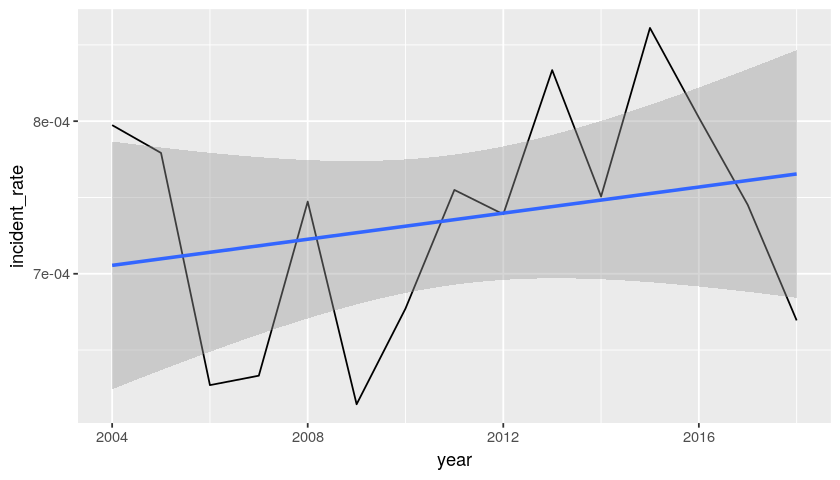

In [6]:
ggplot(learning_data, aes(x = year, y = incident_rate)) +
    geom_line() +
    geom_smooth(method="lm")

### Incident rate by commodity

In [7]:
learning_by_commodity <- pipelines %>%
    filter(commodity %in% c("crude", "hvl", "non_hvl")) %>%
    group_by(year, commodity) %>%
    summarize(miles = sum(total_miles, na.rm = T), 
              incidents = sum(significant_incidents, na.rm = T), 
              incident_rate = incidents/miles)

head(learning_by_commodity) %>%
    jupyter_styling(font_size = 14)

year,commodity,miles,incidents,incident_rate
2004,crude,47665.51,58,0.0012168
2004,hvl,47068.51,20,0.0004249
2004,non_hvl,57006.78,43,0.0007543
2005,crude,45986.23,55,0.0011960
2005,hvl,50421.94,25,0.0004958
2005,non_hvl,62734.67,44,0.0007014


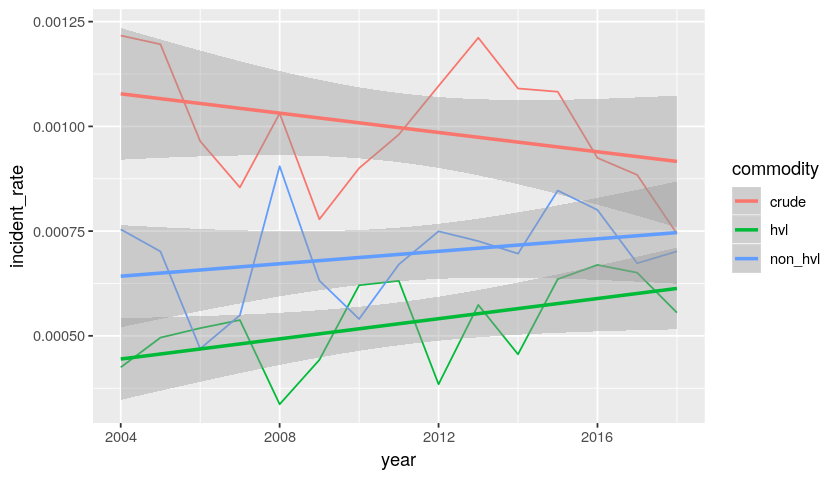

In [8]:
ggplot(learning_by_commodity, aes(x = year, y = incident_rate, color = commodity)) +
    geom_line() +
    geom_smooth(method="lm")

### Learning of largest actors

In [9]:
largest_companies <- pipelines %>%
    group_by(year, ID) %>%
    summarize(total_miles = sum(total_miles, na.rm = T)) %>%
    group_by(ID) %>%
    filter(total_miles == max(total_miles)) %>%
    ungroup() %>%
    top_n(6, total_miles)

largest_companies %>%
    jupyter_styling(font_size = 14)

year,ID,total_miles
2005,Phillips 66 (Group),12000.00
2006,Kinder Morgan (Group),15200.32
2014,31618,23100.73
2017,Magellan (Group),12943.07
2018,Energy Transfer Partners (Group),14658.88
2018,ONEOK (Group),11792.19


In [10]:
learning_by_company <- pipelines %>%
    filter(ID %in% largest_companies$ID) %>%
    group_by(year, ID) %>%
    summarize(miles = sum(total_miles, na.rm = T), 
              incidents = sum(significant_incidents, na.rm = T), 
              incident_rate = incidents/miles) %>%
    ungroup() %>%
    mutate(name = add_company_names(ID))

head(learning_by_company) %>%
    jupyter_styling(font_size = 14)

year,ID,miles,incidents,incident_rate,name
2004,31618,14687.00,7,0.0004766,Enterprise Products Operating
2004,Kinder Morgan (Group),14913.00,16,0.0010729,Kinder Morgan (Group)
2004,Magellan (Group),8538.00,2,0.0002342,Magellan (Group)
2004,ONEOK (Group),175.00,0,0.0000000,ONEOK (Group)
2004,Phillips 66 (Group),6494.00,5,0.0007699,Phillips 66 (Group)
2005,31618,14567.54,12,0.0008237,Enterprise Products Operating


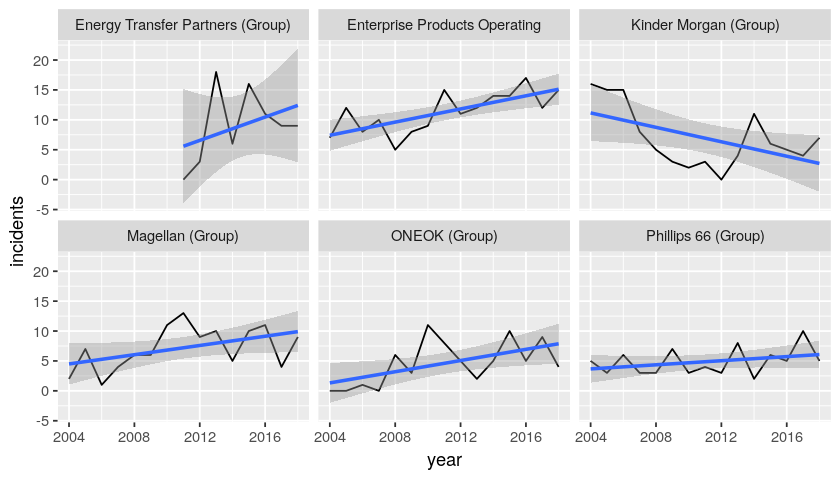

In [11]:
learning_by_company %>%
    filter(miles > 100) %>%
    ggplot(aes(x = year, y = incidents)) +
        facet_wrap(~ name) +
        geom_line() +
        geom_smooth(method="lm")

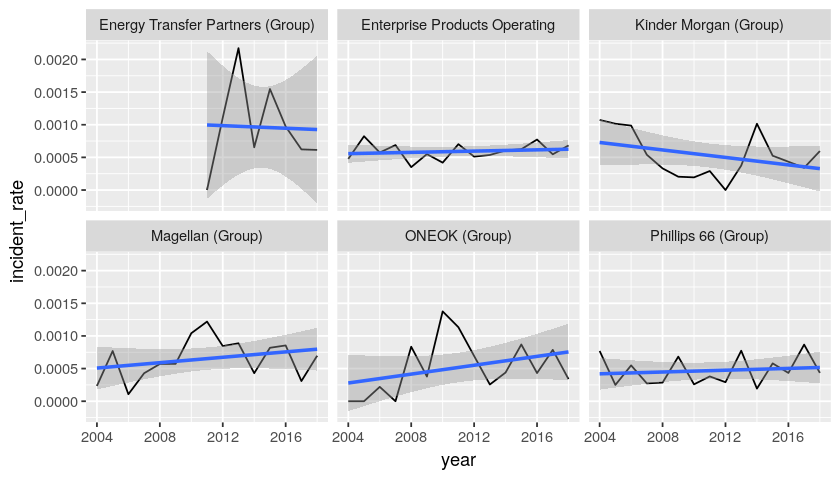

In [12]:
learning_by_company %>%
    filter(miles > 100) %>%
    ggplot(aes(x = year, y = incident_rate)) +
        facet_wrap(~ name) +
        geom_line() +
        geom_smooth(method="lm")

## Learning: Gallons spilled

In [13]:
learning_data <- pipelines %>%
    filter(commodity %in% c("crude", "hvl", "non_hvl")) %>%
    group_by(year) %>%
    summarize(miles = sum(total_miles, na.rm = T), 
              volume = sum(incidents_volume, na.rm = T), 
              volume_per_mile = volume/miles)

head(learning_data) %>%
    jupyter_styling(font_size = 14)

year,miles,volume,volume_per_mile
2004,151740.8,44479.00,0.2931249
2005,159142.8,63749.13,0.4005781
2006,159488.4,64569.56,0.4048542
2007,162668.2,29244.35,0.1797792
2008,164592.0,43761.29,0.2658773
2009,170883.7,17291.52,0.1011888


### Total gallons spilled

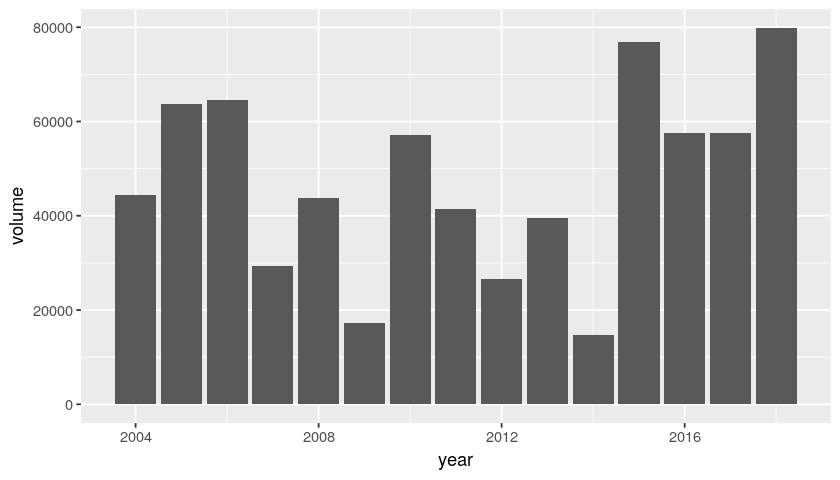

In [14]:
ggplot(learning_data, aes(x = year, y = volume)) +
    geom_col()

### Gallons spilled, normalized trend

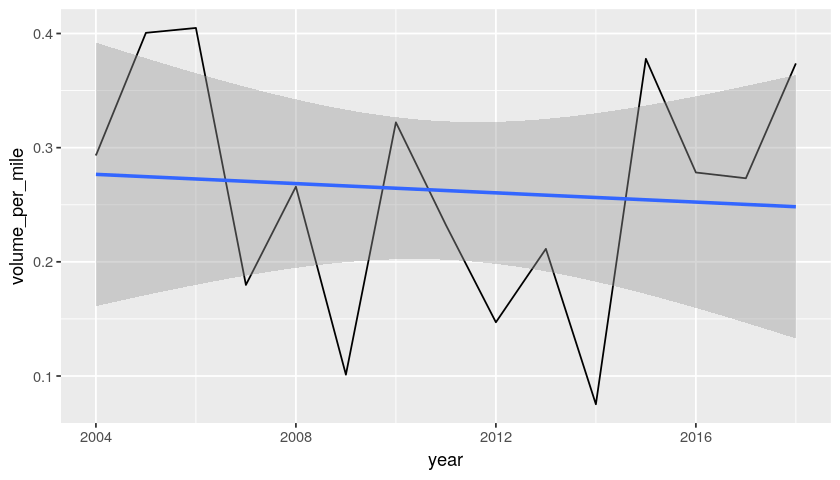

In [15]:
ggplot(learning_data, aes(x = year, y = volume_per_mile)) +
    geom_line() +
    geom_smooth(method="lm")

### Gallons spilled, by commodity

In [16]:
learning_by_commodity <- pipelines %>%
    filter(commodity %in% c("crude", "hvl", "non_hvl")) %>%
    group_by(year, commodity) %>%
    summarize(miles = sum(total_miles, na.rm = T), 
              volume = sum(incidents_volume, na.rm = T), 
              volume_per_mile = volume/miles)

head(learning_by_commodity) %>%
    jupyter_styling(font_size = 14)

year,commodity,miles,volume,volume_per_mile
2004,crude,47665.51,21367.1429,0.4482726
2004,hvl,47068.51,17203.3651,0.3654963
2004,non_hvl,57006.78,5908.4921,0.1036454
2005,crude,45986.23,59091.3492,1.2849793
2005,hvl,50421.94,3795.6825,0.0752784
2005,non_hvl,62734.67,862.0952,0.0137419


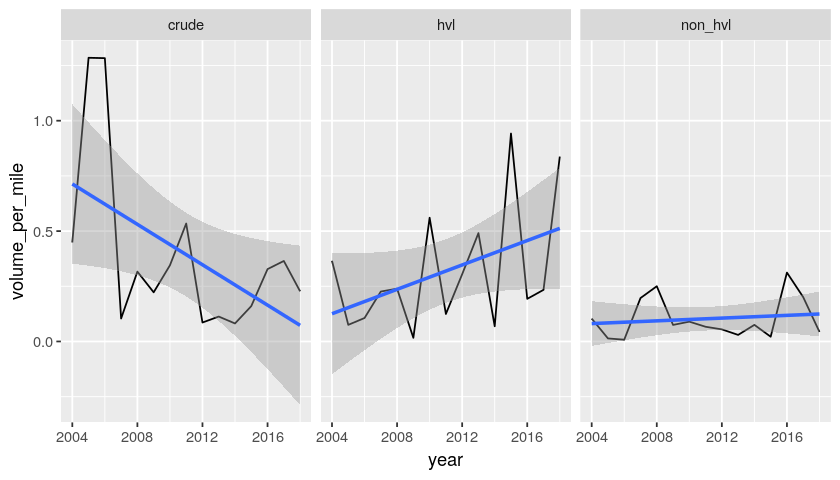

In [17]:
ggplot(learning_by_commodity, aes(x = year, y = volume_per_mile)) +
    facet_wrap(~ commodity) +
    geom_line() +
    geom_smooth(method="lm")

### Gallons spilled, learning by largest companies

In [18]:
learning_by_company <- pipelines %>%
    filter(ID %in% largest_companies$ID) %>%
    group_by(year, ID) %>%
    summarize(miles = sum(total_miles, na.rm = T), 
              volume = sum(incidents_volume, na.rm = T), 
              volume_per_mile = volume/miles) %>%
    ungroup() %>%
    mutate(name = add_company_names(ID))

head(learning_by_company) %>%
    jupyter_styling(font_size = 14)

year,ID,miles,volume,volume_per_mile,name
2004,31618,14687.00,13282.08,0.9043426,Enterprise Products Operating
2004,Kinder Morgan (Group),14913.00,0.00,0.0000000,Kinder Morgan (Group)
2004,Magellan (Group),8538.00,0.00,0.0000000,Magellan (Group)
2004,ONEOK (Group),175.00,0.00,0.0000000,ONEOK (Group)
2004,Phillips 66 (Group),6494.00,0.00,0.0000000,Phillips 66 (Group)
2005,31618,14567.54,3746.81,0.2572026,Enterprise Products Operating


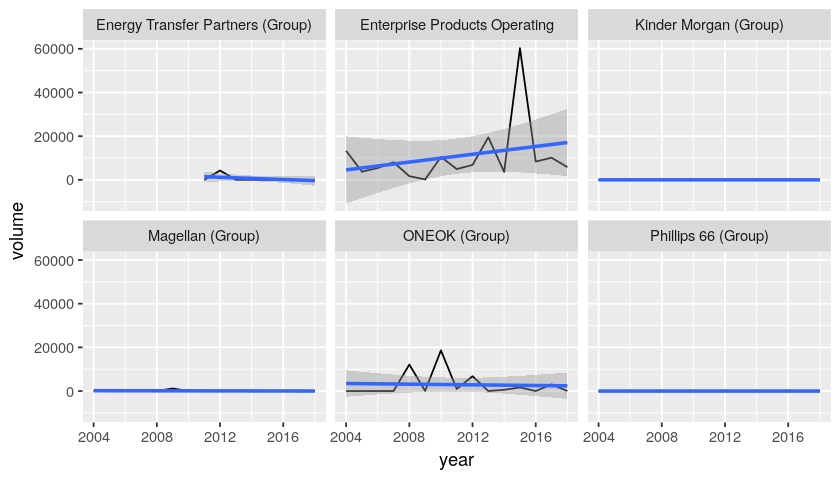

In [19]:
learning_by_company %>%
    filter(miles > 100) %>%
    ggplot(aes(x = year, y = volume)) +
        facet_wrap(~ name) +
        geom_line() +
        geom_smooth(method="lm")

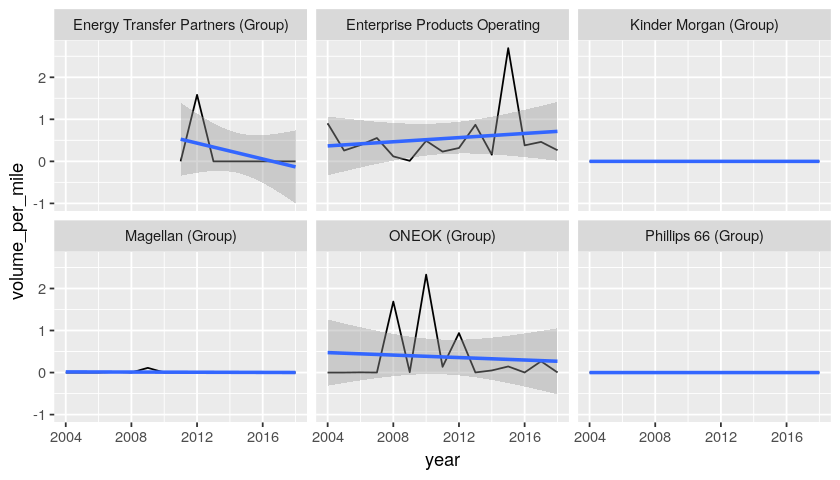

In [20]:
learning_by_company %>%
    filter(miles > 100) %>%
    ggplot(aes(x = year, y = volume_per_mile)) +
        facet_wrap(~ name) +
        geom_line() +
        geom_smooth(method="lm")

## Learning: Cost

In [21]:
learning_data <- pipelines %>%
    filter(commodity %in% c("crude", "hvl", "non_hvl")) %>%
    group_by(year) %>%
    summarize(miles = sum(total_miles, na.rm = T), 
              cost = sum(incidents_cost, na.rm = T), 
              cost_per_mile = cost/miles)

head(learning_data) %>%
    jupyter_styling(font_size = 14)

year,miles,cost,cost_per_mile
2004,151740.8,109879295,724.1249
2005,159142.8,222926900,1400.7976
2006,159488.4,30269082,189.7886
2007,162668.2,21149513,130.0163
2008,164592.0,78511181,477.0048
2009,170883.7,37337232,218.4949


### Cost by year

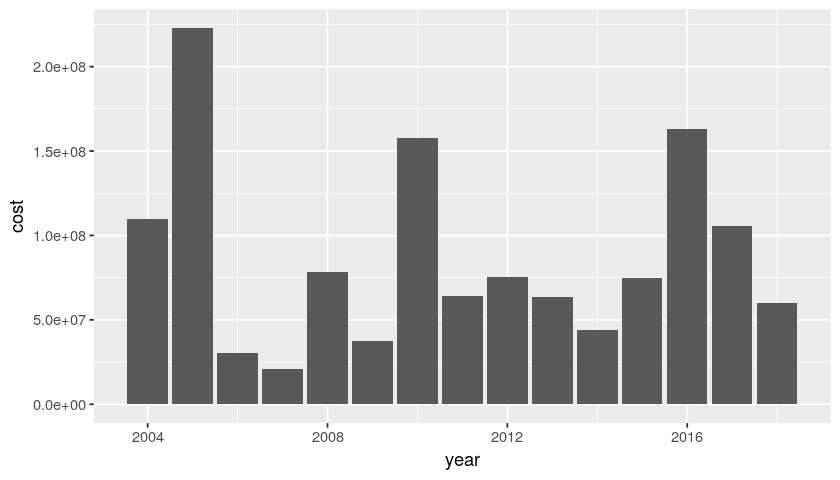

In [22]:
ggplot(learning_data, aes(x = year, y = cost)) +
    geom_col()

### Cost per mile, trend

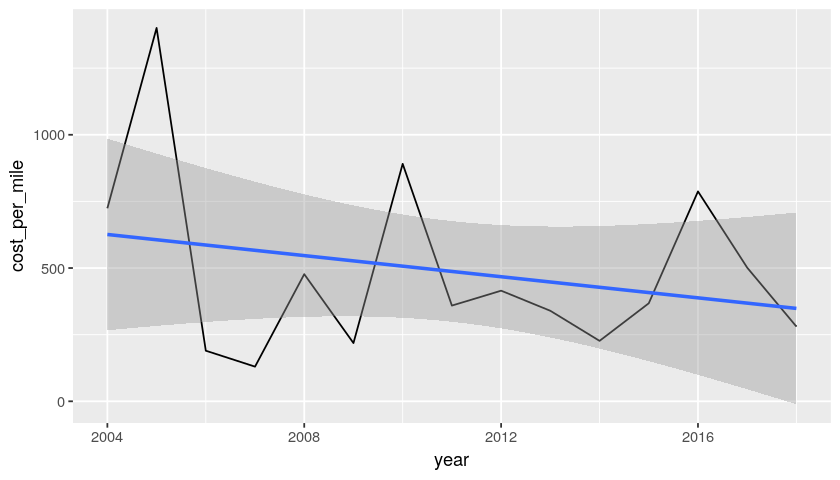

In [23]:
ggplot(learning_data, aes(x = year, y = cost_per_mile)) +
    geom_line() +
    geom_smooth(method="lm")

### Cost by commodity, trend

In [24]:
learning_by_commodity <- pipelines %>%
    filter(commodity %in% c("crude", "hvl", "non_hvl")) %>%
    group_by(year, commodity) %>%
    summarize(miles = sum(total_miles, na.rm = T), 
              cost = sum(incidents_cost, na.rm = T), 
              cost_per_mile = cost/miles)

head(learning_by_commodity) %>%
    jupyter_styling(font_size = 14)

year,commodity,miles,cost,cost_per_mile
2004,crude,47665.51,97966991,2055.30148
2004,hvl,47068.51,2541658,53.99912
2004,non_hvl,57006.78,9370646,164.37775
2005,crude,45986.23,220221152,4788.85030
2005,hvl,50421.94,1810140,35.89985
2005,non_hvl,62734.67,895608,14.27612


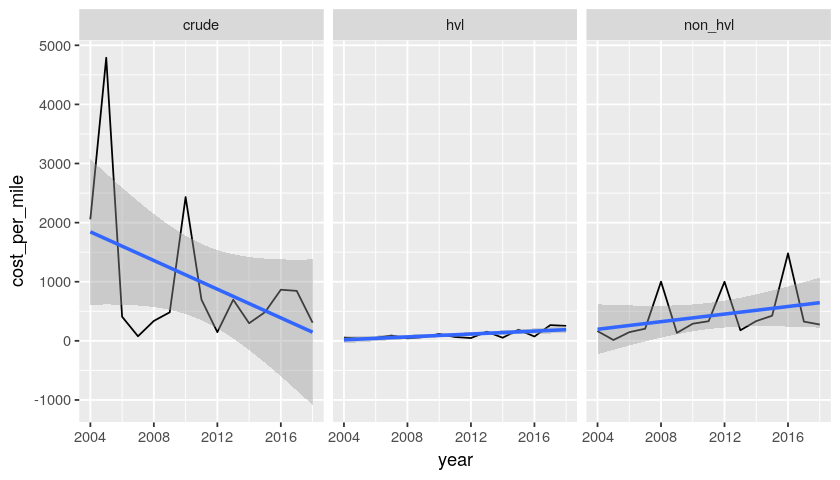

In [25]:
ggplot(learning_by_commodity, aes(x = year, y = cost_per_mile)) +
    facet_wrap(~ commodity) +
    geom_line() +
    geom_smooth(method="lm")

### Cost for largest companies

In [26]:
learning_by_company <- pipelines %>%
    filter(ID %in% largest_companies$ID) %>%
    group_by(year, ID) %>%
    summarize(miles = sum(total_miles, na.rm = T), 
              cost = sum(incidents_cost, na.rm = T), 
              cost_per_mile = cost/miles) %>%
    ungroup() %>%
    mutate(name = add_company_names(ID))

head(learning_by_company) %>%
    jupyter_styling(font_size = 14)

year,ID,miles,cost,cost_per_mile,name
2004,31618,14687.00,1880059,128.0084,Enterprise Products Operating
2004,Kinder Morgan (Group),14913.00,0,0.0000,Kinder Morgan (Group)
2004,Magellan (Group),8538.00,0,0.0000,Magellan (Group)
2004,ONEOK (Group),175.00,0,0.0000,ONEOK (Group)
2004,Phillips 66 (Group),6494.00,0,0.0000,Phillips 66 (Group)
2005,31618,14567.54,1625821,111.6057,Enterprise Products Operating


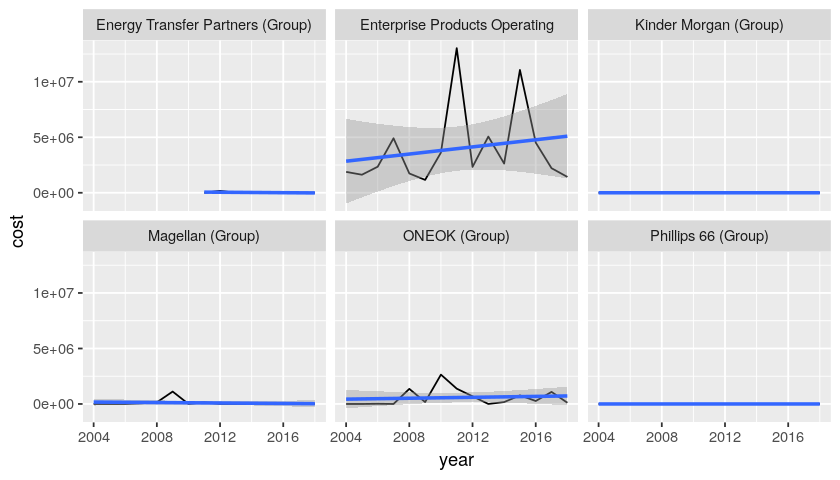

In [27]:
learning_by_company %>%
    filter(miles > 100) %>%
    ggplot(aes(x = year, y = cost)) +
        facet_wrap(~ name) +
        geom_line() +
        geom_smooth(method="lm")

In [ ]:
learning_by_company %>%
    filter(miles > 100) %>%
    ggplot(aes(x = year, y = cost_per_mile)) +
        facet_wrap(~ name) +
        geom_line() +
        geom_smooth(method="lm")

## Notes

### Off/onshore

* Trends (I believe) driven by offshore spills

* Offshore pipelines are still at the beginning of their learning curve

* (And on average spill more, because source often cannot be "shut off"?)

### "Agenda"

* What do I want?
    * I do not want to "kiss up" to oil companies and show their progress
    * But I also do not want to be "unfair"

* I want to illuminate how learning progresses (or not) for less essential functions of an organization
    * For offshore pipelines, learning is still important, because of criticism
    * In terms of onshore leaks, it often affects the powerless
    * Hence learning is less of a priority
    * Location choice is already briefly mentioned by Perrow
    * Often build in cheaper locations, which usually also do not increase in price as a result of pipeline construction

* Is pipeline security based on technological limitations or dominated by conceptualizations (e.g., "there will always be spills")?
    * Why aren't there more "zero incident" instances?

* Genealogy provides a potential "blend" of the two options
    * Individuals approach their work with their presumptions, but they obtain results and feed those back into society
    * Iterative process